# Linear Regression: Advanced
***Part [2/2]***

---

### Objectives
- Review **building a model** (with only numerical data) in StatsModels.
    - Model Summary
    - Interpreting coefficients


- Evaluating **Model Performance.** *(Beyond $R^2$)*


- Encoding **categorical variables.**


- Checking **assumptions of Linear Regression.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('../data/advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
X = df.drop('sales', axis=1)
y = df['sales']

X.shape, y.shape

((200, 3), (200,))

## Review: Building a basic model.

In [4]:
model = sm.OLS(y, X['TV'])
fitted = model.fit()

In [5]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Mon, 07 Mar 2022   Prob (F-statistic):                   3.52e-100
Time:                        17:17:06   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0832      0.002     41.633      0.000       0.079       0.087
==============================================================================
Omnibus:                       20.228   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.930
Skew:                          -0.846   Prob(JB):                     6.36e-06
Kurtosis:                       3.086   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Add constant
X = sm.add_constant(X)

In [7]:
model = sm.OLS(y, X[['const', 'TV']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           1.47e-42
Time:                        17:17:07   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           1.58e-96
Time:                        17:17:07   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluating performance.

In [9]:
# Access predictions.
y_pred = model.predict(X)
y_pred.head()

1    20.523974
2    12.337855
3    12.307671
4    17.597830
5    13.188672
dtype: float64

In [10]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [11]:
# Mean Absolute Error
mean_absolute_error(y, y_pred)

1.252011229687069

In [12]:
# Mean Squared Error
mean_squared_error(y, y_pred)

2.784126314510936

In [13]:
# Root Mean Squared Error
np.sqrt(mean_squared_error(y, y_pred))

1.6685701407225697

## Processing: Categorical Variables & Scaling.

In [14]:
# Load in mpg.
df = sns.load_dataset('mpg')
df.dropna(inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [15]:
df = df.drop('name', axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [16]:
X = df[['cylinders', 'displacement', 'horsepower', 'origin']]
y = df['mpg']

X.shape, y.shape

((392, 4), (392,))

In [17]:
X['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [18]:
dummies = pd.get_dummies(X['origin'], drop_first=True)

X_processed = pd.concat([X.drop('origin', axis=1), dummies], axis=1)
X_processed.head()

,cylinders,displacement,horsepower,japan,usa
0,8,307.0,130.0,0,1
1,8,350.0,165.0,0,1
2,8,318.0,150.0,0,1
3,8,304.0,150.0,0,1
4,8,302.0,140.0,0,1


## Remodeling: Include All Predictors


In [19]:
model = sm.OLS(y, sm.add_constant(X_processed)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     169.0
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           7.36e-95
Time:                        17:17:07   Log-Likelihood:                -1133.9
No. Observations:                 392   AIC:                             2280.
Df Residuals:                     386   BIC:                             2304.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           38.9742      1.362     28.618      0.000      36.297      41.652
cylinders       -0.8845      0.424     -2.087      0.038      -1.718      -0.051
displacement    -0.0145      0.009     -1.570      0.117      -0.033       0.004
horsepower      -0.0757      0.014     -5.494      0.000      -0.103      -0.049
japan            2.6390      0.729      3.621      0.000       1.206       4.072
usa             -0.7835      0.740     -1.059      0.290      -2.238       0.671
==============================================================================
Omnibus:                       32.867   Durbin-Watson:                   1.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.108
Skew:                           0.639   Prob(JB):                     4.36e-10
Kurtosis:                       4.002   Cond. No.                     1.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting coefficients.

## Checking for Assumptions

### 1. Linearity

**The relationship between the target and predictor is linear.** Check this by drawing a scatter plot of your predictor and your target, and see if there is evidence that the relationship might not follow a straight line OR look at the correlation coefficient.

**What can I do if it looks like I'm violating this assumption?**

- Consider log-scaling your data.
- Consider a different type of model!

### 2. Normality
The normality assumption states that the model _residuals_ should follow a normal distribution.
**Note**: the normality assumption talks about the model residuals and not about the distributions of the variables!

**How can I check for this?**
* Check the Omnibus value (This is a test for error normality. The probability is the chance that the errors are normally distributed.)
    - Normal Test *https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html*
* Build a QQ-Plot.

**What can I do if it looks like I'm violating this assumption?**
* Drop outliers 
* Consider log-scaling your data 

***Demo: Sample Residual Distributions and their QQ-plots.***

<img src='https://github.com/learn-co-students/dsc-01-10-11-regression-assumptions-online-ds-ft-031119/raw/master/images/inhouse_qq_plots.png' width=700/>

---

```python
# Demo of `qqplot` code.
fig = sm.graphics.qqplot(residuals, line='45', fit=True);
```

<AxesSubplot:>

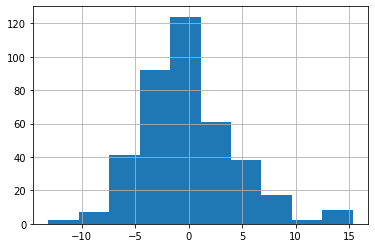

In [20]:
# "Quick and dirty"
model.resid.hist()

### 3. Homoskedasticity

The errors should be homoskedastic. That is, the errors have the same variance.

Basically if the residuals are evenly spread through range

<img src='https://github.com/learn-co-students/dsc-01-10-11-regression-assumptions-online-ds-ft-031119/raw/master/images/homo_2.png' width=700/>

The residual errors have the same variance.

**How can I check for this?**

* Check the Durbin-Watson score (This is a test for error homoskedasticity. We're looking for values between ~1.5 and ~2.5).
    - Documentation: *https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.durbin_watson.html*
    - Demonstration: *https://www.statology.org/durbin-watson-test-python/*
* Build an error plot, i.e. a plot of errors for a particular predictor (vs. the values of that predictor).

**What can I do if it looks like I'm violating this assumption?**

* Consider dropping extreme values.
* Consider log-scaling your target.
* Consider a different type of model!

```python
# Demo of Homoskedasticity
plt.scatter(x=fitted.fittedvalues,y=fitted.resid)
```

### 4. Multicollinearity

The interpretation of a regression coefficient is that it represents the average change in the dependent variable for each 1 unit change in a predictor, assuming that all the other predictor variables are kept constant. Multicollinearity occurs when 2 or more of the independent variables are highly correlated with each other.

**How can I check for this?**
1. Use `variance_inflation_factor()`
2. Look at a scatter matrix 
3. Look at a heatmap 

**What can I do if it looks like I'm violating this assumption?**
- Remove features that are highly collinear with each other.

#### Important: Note on *VIF*
> *The variance inflation factor is a measure for the increase of the
variance of the parameter estimates if an additional variable, given by
exog_idx is added to the linear regression. It is a measure for
multicollinearity of the design matrix, exog.*
>
> ***One recommendation is that if VIF is greater than 5, then the explanatory
variable given by exog_idx is highly collinear with the other explanatory
variables***, *and the parameter estimates will have large standard errors
because of this.*


***Important***
- **When using VIF, you must include an intercept (constant column) for the results of this test to be accurate.**

In [21]:
# Writing a function to create VIF dictionary.
def create_vif_dictionary(X):
    """
    Parameters
    ----------
    X: Pandas dataframe of predictive variables only.
        Should have `.columns` and `.values` attributes.
    """
    
    vif_dct = {}

    # Loop through each row and set the variable name to the VIF. 
    for i in range(len(X.columns)):
        # Calculate VIF
        vif = variance_inflation_factor(X.values, i)
        
        # Extract column name for dictionary key.
        v = X.columns[i]
        
        # Set value in dictionary.
        vif_dct[v] = vif

    return vif_dct

In [22]:
pd.Series(create_vif_dictionary(sm.add_constant(X_processed)))

const           37.569752
cylinders       10.563596
displacement    18.901027
horsepower       5.685474
japan            1.731181
usa              2.597280
dtype: float64

In [23]:
pd.Series(
    create_vif_dictionary(
        sm.add_constant(X_processed.drop('displacement', axis=1))))

const         15.281945
cylinders      4.203469
horsepower     3.467786
japan          1.726507
usa            2.307198
dtype: float64